# EDA

To understand the data and identify the trends, patterns, or relationships and find the important features in the dataset.

### Background

Many people struggle to get loans due to insufficient or non-existent credit histories. Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience. Home Credit makes use of a variety of alternative data to predict their clients' repayment abilities. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


### Objective

The objective of this project is to use historical loan application data to predict whether or not an applicant will be able to repay a loan.


### Dataset

Dataset is provided by Home Credit Group on [kaggle](https://www.kaggle.com/competitions/home-credit-default-risk/overview) consists of 8 files, including:
1. application_{train|test}.csv 
    * This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
    * Static data for all applications. One row represents one loan in our data sample.


2. bureau.csv 
    * All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
    * For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.


3. bureau_balance.csv
    * Monthly balances of previous credits in Credit Bureau. 
    * This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.


4. POS_CASH_balance.csv
    * Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
    * This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.


5. credit_card_balance.csv
    * Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
    * This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.


6. previous_application.csv
    * All previous applications for Home Credit loans of clients who have loans in our sample.
    * There is one row for each previous application related to loans in our data sample.


7. installments_payments.csv
    * Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
    * There is a) one row for every payment that was made plus b) one row each for missed payment.
    * One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## application_train

In [2]:
app_train = pd.read_csv("application_train.csv")
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [17]:
app_train.shape

(307511, 122)

### Categorical Features

#### Descriptive Statistics

In [123]:
cat_cols = app_train.select_dtypes(include = ['object','category']).columns
app_train[cat_cols].describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


#### Correlation Matrix of Categorical Features

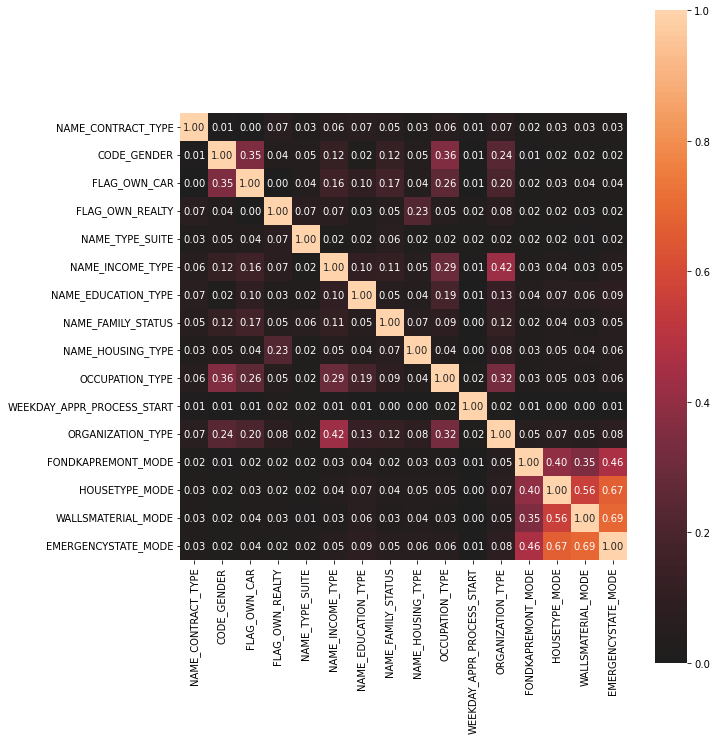

In [130]:
cat_df = app_train[cat_cols]
categorical_correlation= associations(cat_df, 
                                      filename= 'categorical_correlation.png', 
                                      figsize=(10,12))

#### Distribution of Target Variable

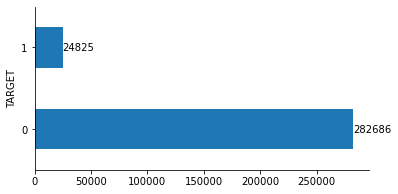

In [81]:
plt.figure(figsize=(6,3))
ax = app_train.groupby('TARGET')['SK_ID_CURR'].count().plot(kind='barh')
plt.bar_label(ax.containers[0])
sns.despine()

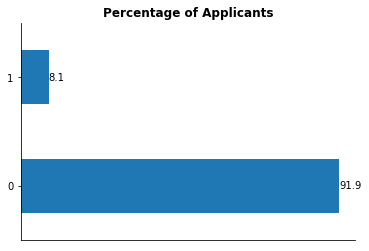

In [9]:
ax = app_train['TARGET'].value_counts(normalize=True).mul(100).round(decimals=1).plot(kind='barh')
plt.bar_label(ax.containers[0])
plt.title("Percentage of Applicants", fontweight='bold')
sns.despine()
ax.axes.xaxis.set_visible(False)

The target variable is imbalance with the majority of loans has the target equals to 0 which indicates that individuals did not had any problems in paying installments in given time. There are about 91.9% loans which is equal to about 282K with target = 0, While only 8.1% of the total loans (about 24K applicants) in this dataset involved the applicants having problems in repaying the loan.

In [10]:
app_train.groupby('TARGET').agg({'AMT_CREDIT':'sum'}).reset_index()

,TARGET,AMT_CREDIT
0,0,1.703602e+11
1,1,1.384685e+10


#### The company lost $13,846,850,000 because 8.1% default credits

#### Gender of Applicants

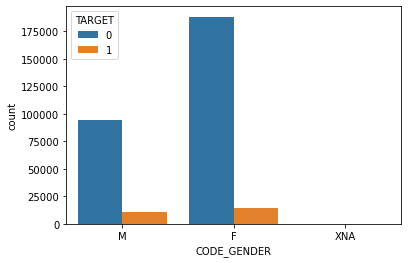

In [41]:
ax = sns.countplot(x='CODE_GENDER', data=app_train, hue='TARGET')

The majority of loan applicants are women which is almost the double as the men. However, a larger percentage of men had the problems in paying the loan as compared to women applicants.

#### Family Status of Applicants

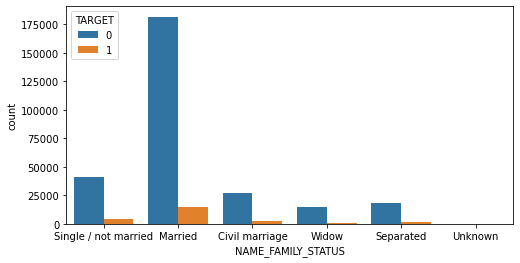

In [45]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='NAME_FAMILY_STATUS', data=app_train, hue='TARGET')

Text(0.5, 20.80000000000002, '')

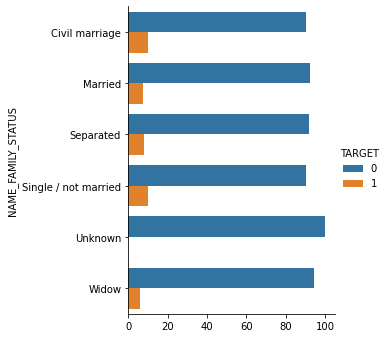

In [85]:
x, y = 'NAME_FAMILY_STATUS', 'TARGET'
(app_train.groupby(x)[y].value_counts(normalize=True)
.mul(100).rename('Percentage').reset_index()
.pipe((sns.catplot, 'data'), y=x, x='Percentage', hue=y, kind='bar'))
plt.xlabel(None)

The largest number of loan applications are made by married customers. However, people having Civil Marriage and Single has the highest percentage (about 10%) of loan payment difficulties. Widow applicants tend to have less chance of becoming defaulters.

#### Real Estate and Car Ownership

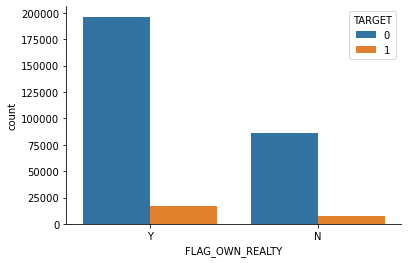

In [79]:
ax = sns.countplot(x='FLAG_OWN_REALTY', data=app_train, hue='TARGET')
sns.despine()

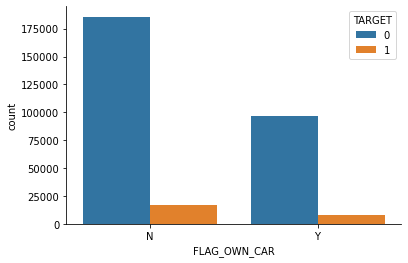

In [80]:
ax = sns.countplot(x='FLAG_OWN_CAR', data=app_train, hue='TARGET')
sns.despine()

About 70% of the applicants own Real Estate, while only 34% of applicants own Car who had applied for the loan in the past years. However, the applicants who didn't own car or didn't own real estate have the higher percentage of loan payment difficulties.

#### Suite Type and Income Type

Text(0.5, 23.006875000000008, '')

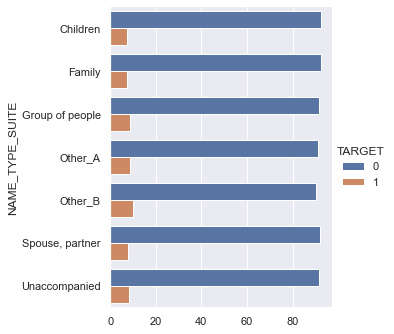

In [130]:
x, y = 'NAME_TYPE_SUITE', 'TARGET'
(app_train.groupby(x)[y].value_counts(normalize=True)
.mul(100).rename('Percentage').reset_index()
.pipe((sns.catplot, 'data'), y=x, x='Percentage', hue=y, kind='bar'))
plt.xlabel(None)

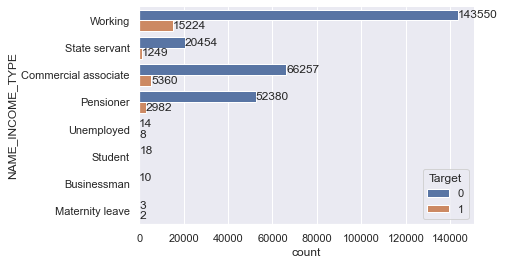

In [136]:
ax = sns.countplot(y='NAME_INCOME_TYPE', data=app_train, hue='TARGET')
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
sns.despine()
plt.legend(title='Target',loc='lower right')

Text(0.5, 23.006875000000008, '')

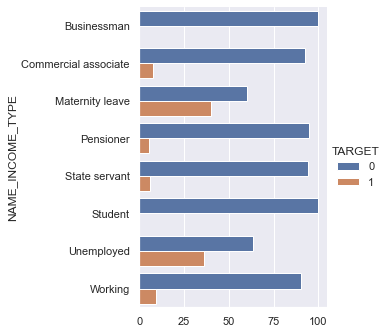

In [135]:
x, y = 'NAME_INCOME_TYPE', 'TARGET'
(app_train.groupby(x)[y].value_counts(normalize=True)
.mul(100).rename('Percentage').reset_index()
.pipe((sns.catplot, 'data'), y=x, x='Percentage', hue=y, kind='bar'))
plt.xlabel(None)

Most of the applicants have working income type where 10% of it has loan payment difficulties.

#### Contract Type

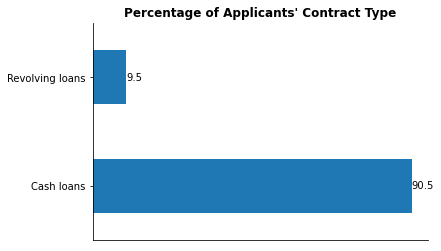

In [84]:
ax = app_train['NAME_CONTRACT_TYPE'].value_counts(normalize=True).mul(100).round(decimals=1).plot(kind='barh')
plt.bar_label(ax.containers[0])
plt.title("Percentage of Applicants' Contract Type", fontweight='bold')
sns.despine()
ax.axes.xaxis.set_visible(False)

Text(0.5, 21.706249999999983, '')

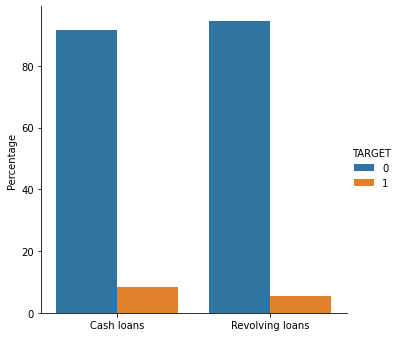

In [68]:
x, y = 'NAME_CONTRACT_TYPE', 'TARGET'
(app_train.groupby(x)[y].value_counts(normalize=True)
.mul(100).rename('Percentage').reset_index()
.pipe((sns.catplot, 'data'), x=x, y='Percentage', hue=y, kind='bar'))
plt.xlabel(None)

#### Education Type and Housing Type

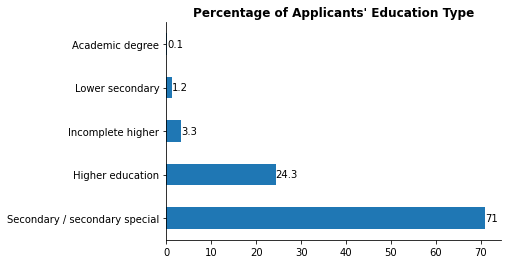

In [64]:
ax = app_train['NAME_EDUCATION_TYPE'].value_counts(normalize=True).mul(100).round(decimals=1).plot(kind='barh')
plt.bar_label(ax.containers[0])
plt.title("Percentage of Applicants' Education Type", fontweight='bold')
sns.despine()
ax.axes.xaxis.set_visible(False)

Text(0.5, 20.80000000000002, '')

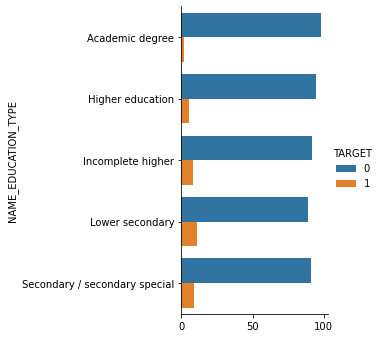

In [31]:
x, y = 'NAME_EDUCATION_TYPE', 'TARGET'
(app_train.groupby(x)[y].value_counts(normalize=True)
.mul(100).rename('Percentage').reset_index()
.pipe((sns.catplot, 'data'), y=x, x='Percentage', hue=y, kind='bar'))
plt.xlabel(None)

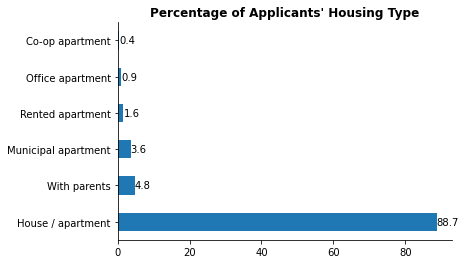

In [65]:
ax = app_train['NAME_HOUSING_TYPE'].value_counts(normalize=True).mul(100).round(decimals=1).plot(kind='barh')
plt.bar_label(ax.containers[0])
plt.title("Percentage of Applicants' Housing Type", fontweight='bold')
sns.despine()
ax.axes.xaxis.set_visible(False)

Text(0.5, 20.80000000000002, '')

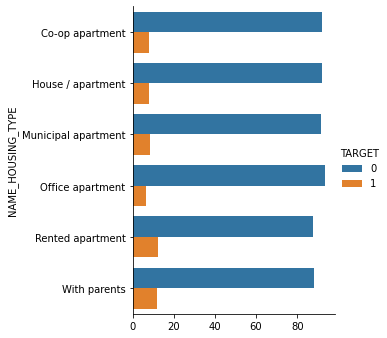

In [29]:
x, y = 'NAME_HOUSING_TYPE', 'TARGET'
(app_train.groupby(x)[y].value_counts(normalize=True)
.mul(100).rename('Percentage').reset_index()
.pipe((sns.catplot, 'data'), y=x, x='Percentage', hue=y, kind='bar'))
plt.xlabel(None)

* The majority of applications have secondary education. The applicants with Lower Secondary education status has the highest percentage of payment related problems.
* Applicants living in House/apartments has the highest number of loan apllications equal to 88.7%. Applicants who live in office apartment are more likely to pay the loan on time.  The applicants living in rented apartments have the highest percentage of payment related problems.

#### Application Day of the Week

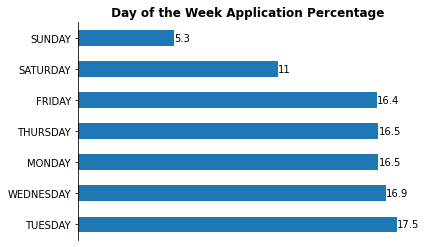

In [77]:
ax = app_train['WEEKDAY_APPR_PROCESS_START'].value_counts(normalize=True).mul(100).round(decimals=1).plot(kind='barh')
plt.bar_label(ax.containers[0])
plt.title(" Day of the Week Application Percentage", fontweight='bold')
sns.despine(bottom=True)
ax.axes.xaxis.set_visible(False)

### Numerical Features

#### Descriptive Statistics

In [83]:
num_cols = app_train.select_dtypes(include = ['number']).columns
app_train[num_cols].describe().round(decimals=0).T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278181.0,102790.0,100002.0,189146.0,278202.0,367142.0,456255.0
TARGET,307511.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168798.0,237123.0,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599026.0,402491.0,45000.0,270000.0,513531.0,808650.0,4050000.0
AMT_ANNUITY,307499.0,27109.0,14494.0,1616.0,16524.0,24903.0,34596.0,258026.0
AMT_GOODS_PRICE,307233.0,538396.0,369446.0,40500.0,238500.0,450000.0,679500.0,4050000.0
REGION_POPULATION_RELATIVE,307511.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DAYS_BIRTH,307511.0,-16037.0,4364.0,-25229.0,-19682.0,-15750.0,-12413.0,-7489.0
DAYS_EMPLOYED,307511.0,63815.0,141276.0,-17912.0,-2760.0,-1213.0,-289.0,365243.0


#### Correlation

In [118]:
# sort the highest correlated features to the target variable
feature_corr = abs(app_train.corr()['TARGET']).sort_values(ascending=False)
feature_corr.head(20)

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
FLOORSMAX_AVG                  0.044003
FLOORSMAX_MEDI                 0.043768
FLOORSMAX_MODE                 0.043226
DAYS_REGISTRATION              0.041975
AMT_GOODS_PRICE                0.039645
OWN_CAR_AGE                    0.037612
Name: TARGET, dtype: float64

#### Distribution Plot

In [11]:
def univariate_analysis(df, col, x='TARGET'):
    sns.set(style='darkgrid')
    plt.figure(figsize=(25, 5))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(data=df, y=col, x=x,orient='v').set(title='Box Plot')
    #plt.yscale('log')
    
    plt.subplot(1, 3, 2)
    sns.distplot(df[col].dropna()).set(title='Box Plot')
    #plt.yscale('log')

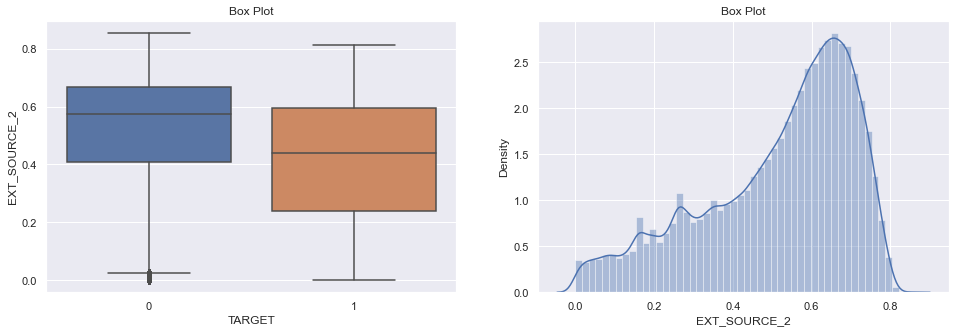

In [126]:
univariate_analysis(df=app_train,col='EXT_SOURCE_2')

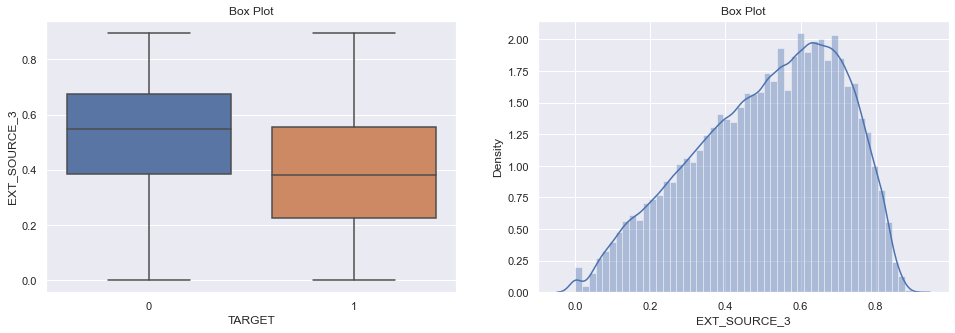

In [123]:
univariate_analysis(df=app_train,col='EXT_SOURCE_3')

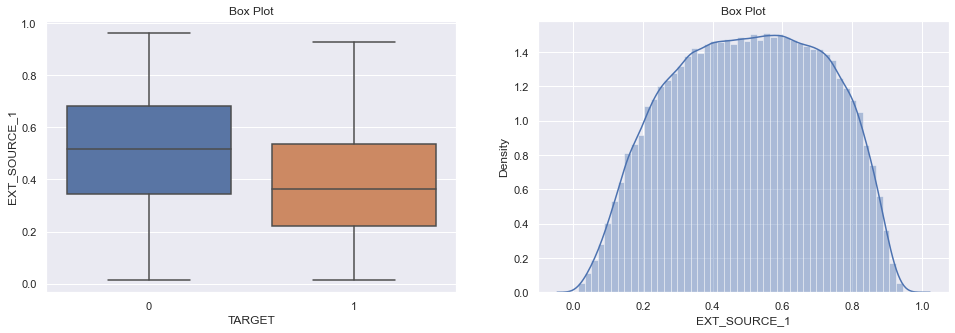

In [124]:
univariate_analysis(df=app_train,col='EXT_SOURCE_1')

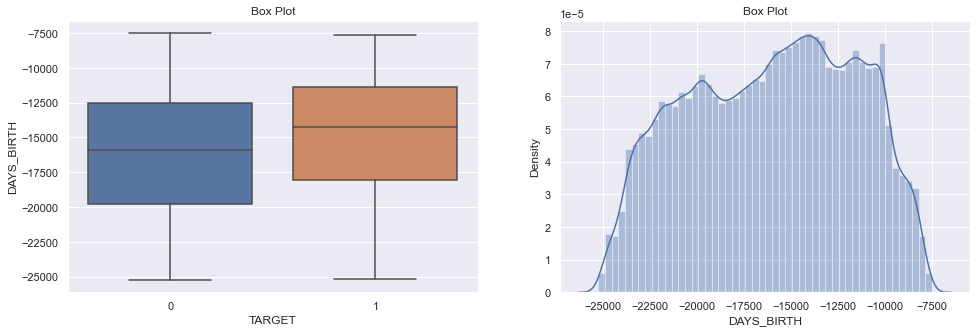

In [128]:
univariate_analysis(df=app_train,col='DAYS_BIRTH')

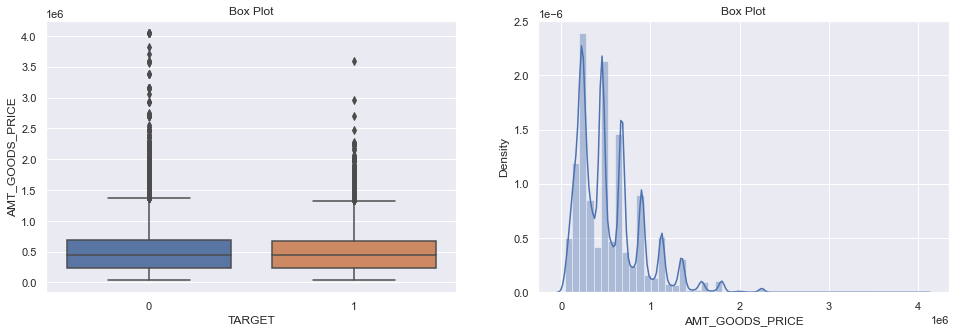

In [119]:
univariate_analysis(df=app_train,col='AMT_GOODS_PRICE')

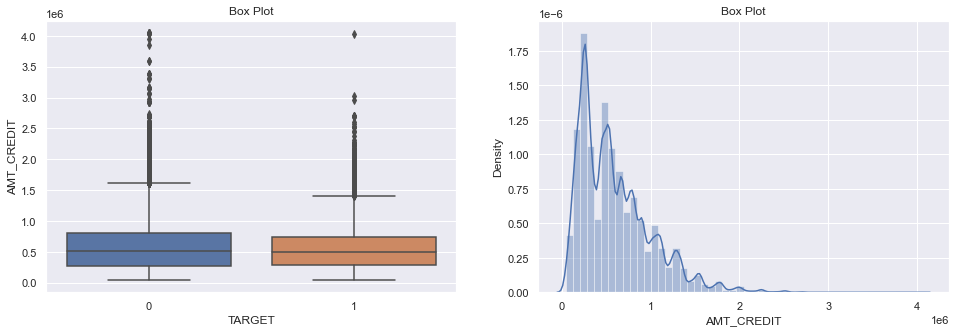

In [116]:
univariate_analysis(df=app_train,col='AMT_CREDIT')

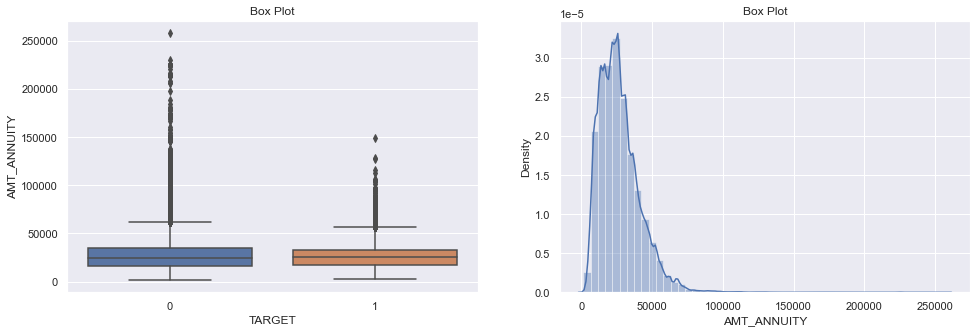

In [118]:
univariate_analysis(df=app_train,col='AMT_ANNUITY')

# Feature Engineering

## bureau

In [17]:
bureau = pd.read_csv("bureau.csv")
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [6]:
for col in bureau.select_dtypes(include=['object','bool']).columns:
    print(col)
    print(bureau[col].unique())
    print()

CREDIT_ACTIVE
['Closed' 'Active' 'Sold' 'Bad debt']

CREDIT_CURRENCY
['currency 1' 'currency 2' 'currency 4' 'currency 3']

CREDIT_TYPE
['Consumer credit' 'Credit card' 'Mortgage' 'Car loan' 'Microloan'
 'Loan for working capital replenishment' 'Loan for business development'
 'Real estate loan' 'Unknown type of loan' 'Another type of loan'
 'Cash loan (non-earmarked)' 'Loan for the purchase of equipment'
 'Mobile operator loan' 'Interbank credit'
 'Loan for purchase of shares (margin lending)']



In [18]:
bureau_avg = bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].mean().round(decimals=1)
bureau_avg = bureau_avg.to_frame().reset_index()

bureau_count = bureau.groupby('SK_ID_CURR')['SK_ID_BUREAU'].count()
bureau_count = bureau_count.to_frame().reset_index()

bureau_bad_debt = bureau[bureau['CREDIT_ACTIVE']=='Bad debt'].groupby('SK_ID_CURR')['SK_ID_BUREAU'].count()
bureau_bad_debt = bureau_bad_debt.to_frame().reset_index()

bureau_avg = pd.merge(right=bureau_count, left=bureau_avg, how='inner', on='SK_ID_CURR')
bureau_avg = pd.merge(right=bureau_bad_debt, left=bureau_avg, how='inner', on='SK_ID_CURR')
bureau_avg.columns = ['SK_ID_CURR', 'b_avg_AMT_CREDIT_SUM', 'b_bureau_count', 'b_bad_debt_count']

In [19]:
bureau_avg.sample(1)

,SK_ID_CURR,b_avg_AMT_CREDIT_SUM,b_bureau_count,b_bad_debt_count
13,337762,149418.0,9,1


## previous_application

In [20]:
prev_app = pd.read_csv("previous_application.csv")
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
for col in prev_app.select_dtypes(include=['object','bool']).columns:
    print(col)
    print(prev_app[col].unique())
    print()

NAME_CONTRACT_TYPE
['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']

WEEKDAY_APPR_PROCESS_START
['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']

FLAG_LAST_APPL_PER_CONTRACT
['Y' 'N']

NAME_CASH_LOAN_PURPOSE
['XAP' 'XNA' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Refusal to name the goal'
 'Money for a third person']

NAME_CONTRACT_STATUS
['Approved' 'Refused' 'Canceled' 'Unused offer']

NAME_PAYMENT_TYPE
['Cash through the bank' 'XNA' 'Non-cash from your account'
 'Cashless from the account of the employer']

CODE_REJECT_REASON
['XAP' 'HC' 'LIMIT' 'CLIENT' 'SCOFR' 'SCO' 'XNA' 'VERIF' 'SYSTEM']

NAME_T

In [22]:
prev_app.loc[prev_app['SK_ID_CURR']==108129]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
335841,1536272,108129,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-515,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0
588441,2068863,108129,Consumer loans,4830.930,47250.0,23688.0,24750.0,47250.0,THURSDAY,11,Y,1,0.556485,NaN,NaN,XAP,Approved,-619,Cash through the bank,XAP,Family,Repeater,Audio/Video,POS,XNA,Stone,110,Consumer electronics,6.0,high,POS household with interest,365243.0,-588.0,-438.0,-588.0,-580.0,0.0
617224,2551979,108129,Consumer loans,6664.275,71352.0,71352.0,0.0,71352.0,WEDNESDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-1208,Cash through the bank,XAP,Unaccompanied,New,Consumer Electronics,POS,XNA,Stone,108,Furniture,12.0,low_normal,POS industry with interest,365243.0,-1176.0,-846.0,-846.0,-840.0,0.0
692217,2517198,108129,Revolving loans,11250.000,0.0,225000.0,NaN,NaN,TUESDAY,13,Y,1,NaN,NaN,NaN,XAP,Approved,-957,XNA,XAP,NaN,Repeater,XNA,Cards,x-sell,Contact center,-1,XNA,0.0,XNA,Card X-Sell,-713.0,-673.0,365243.0,-461.0,-61.0,0.0
1380202,1760610,108129,Consumer loans,8593.965,33052.5,33052.5,0.0,33052.5,SUNDAY,10,Y,1,0.000000,NaN,NaN,XAP,Approved,-819,Cash through the bank,XAP,Unaccompanied,Repeater,Computers,POS,XNA,Stone,108,Furniture,4.0,low_action,POS industry with interest,365243.0,-783.0,-693.0,-753.0,-748.0,0.0


In [23]:
prev_app['INTEREST_RATE'] = round((prev_app['AMT_ANNUITY'] * prev_app['CNT_PAYMENT'] - prev_app['AMT_CREDIT'])/prev_app['AMT_CREDIT']*100, 1)

In [24]:
prev_app.head(1)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,INTEREST_RATE
0,2030495,271877,Consumer loans,1730.43,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,21.1


In [25]:
prev_app_avg = prev_app[prev_app['NAME_CONTRACT_STATUS']=='Refused'].groupby('SK_ID_CURR')['AMT_CREDIT'].mean().round(decimals=1)
prev_app_avg = prev_app_avg.to_frame().reset_index()

prev_app_count = prev_app.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
prev_app_count = prev_app_count.to_frame().reset_index()

prev_app_refused = prev_app[prev_app['NAME_CONTRACT_STATUS']=='Refused'].groupby('SK_ID_CURR')['SK_ID_PREV'].count()
prev_app_refused = prev_app_refused.to_frame().reset_index()

refused_interest_rate = prev_app[prev_app['NAME_CONTRACT_STATUS']=='Refused'].groupby('SK_ID_CURR')['INTEREST_RATE'].mean().round(decimals=1)
refused_interest_rate = refused_interest_rate.to_frame().reset_index()

prev_app_avg = pd.merge(right=prev_app_count, left=prev_app_avg, how='inner', on='SK_ID_CURR')
prev_app_avg = pd.merge(right=prev_app_refused, left=prev_app_avg, how='inner', on='SK_ID_CURR')
prev_app_avg = pd.merge(right=refused_interest_rate, left=prev_app_avg, how='inner', on='SK_ID_CURR')
prev_app_avg.columns = ['SK_ID_CURR', 'p_avg_refused_AMT_CREDIT', 'p_prev_app_count', 'p_refused_count', 'p_refused_interest_rate']

In [26]:
prev_app_avg.sample(1)

,SK_ID_CURR,p_avg_refused_AMT_CREDIT,p_prev_app_count,p_refused_count,p_refused_interest_rate
87388,363402,133735.5,8,1,10.6


## installments_payments

In [73]:
installment = pd.read_csv("installments_payments.csv")
installment.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [74]:
installment.loc[installment['SK_ID_CURR']==206359]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
3804768,2085578,206359,1.0,3,-1351.0,-1352.0,22057.155,22057.155
3807073,2038901,206359,1.0,4,-505.0,-543.0,24224.490,24224.490
3807256,1449784,206359,0.0,7,-1047.0,-1051.0,3078.675,2700.000
3821160,1449784,206359,0.0,42,-529.0,-529.0,2250.000,2250.000
3835937,1449784,206359,0.0,21,-832.0,-843.0,2966.895,2966.895
3881194,1799019,206359,1.0,10,-2558.0,-2557.0,5246.010,5246.010
3885003,1449784,206359,0.0,24,-811.0,-811.0,1219.905,1219.905
3904829,1449784,206359,0.0,43,-498.0,-502.0,2250.000,2250.000
3919435,1449784,206359,0.0,67,-134.0,-134.0,130.815,130.815
3927341,2085578,206359,1.0,30,-541.0,-566.0,22057.155,22057.155


## Pos Cash Balance

In [27]:
pos_cash_bal = pd.read_csv("POS_CASH_balance.csv")
pos_cash_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [28]:
for col in pos_cash_bal.select_dtypes(include=['object','bool']).columns:
    print(col)
    print(pos_cash_bal[col].unique())
    print()

NAME_CONTRACT_STATUS
['Active' 'Completed' 'Signed' 'Approved' 'Returned to the store' 'Demand'
 'Canceled' 'XNA' 'Amortized debt']



In [29]:
pos_cash_bal.loc[pos_cash_bal['SK_ID_CURR']==100001]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1261679,1851984,100001,-96,4.0,2.0,Active,0,0
1891462,1851984,100001,-95,4.0,1.0,Active,7,7
2197888,1369693,100001,-53,4.0,0.0,Completed,0,0
4704415,1369693,100001,-54,4.0,1.0,Active,0,0
4928574,1851984,100001,-93,4.0,0.0,Completed,0,0
7167007,1369693,100001,-57,4.0,4.0,Active,0,0
7823681,1369693,100001,-55,4.0,2.0,Active,0,0
8531326,1851984,100001,-94,4.0,0.0,Active,0,0
8789081,1369693,100001,-56,4.0,3.0,Active,0,0


In [30]:
pos_cash_bal_min = pos_cash_bal[pos_cash_bal['NAME_CONTRACT_STATUS']=='Active'].groupby(['SK_ID_CURR','SK_ID_PREV'])['CNT_INSTALMENT_FUTURE'].min()
pos_cash_bal_min = pos_cash_bal_min.to_frame().reset_index()

pos_cash_bal_sum = pos_cash_bal_min.groupby('SK_ID_CURR')['CNT_INSTALMENT_FUTURE'].sum()
pos_cash_bal_sum = pos_cash_bal_sum.to_frame().reset_index()

pos_cash_bal_count = pos_cash_bal_min[pos_cash_bal_min['CNT_INSTALMENT_FUTURE']!=0.0].groupby('SK_ID_CURR')['SK_ID_PREV'].nunique()
pos_cash_bal_count = pos_cash_bal_count.to_frame().reset_index()

pos_cash_bal_sum = pd.merge(right=pos_cash_bal_count, left=pos_cash_bal_sum, how='inner', on='SK_ID_CURR')
pos_cash_bal_sum.columns = ['SK_ID_CURR', 'pcb_sum_CNT_INSTALMENT_FUTURE', 'pcb_prev_credit_count']

In [31]:
pos_cash_bal_sum.sample(1)

,SK_ID_CURR,pcb_sum_CNT_INSTALMENT_FUTURE,pcb_prev_credit_count
77688,189054,28.0,4


In [32]:
pos_cash_bal_min.loc[pos_cash_bal_min['SK_ID_CURR']==321309]

,SK_ID_CURR,SK_ID_PREV,CNT_INSTALMENT_FUTURE
578804,321309,1481961,0.0
578805,321309,1486608,9.0
578806,321309,1791010,1.0
578807,321309,2116176,1.0


## Credit Card Balance

In [100]:
credit_card_bal = pd.read_csv("credit_card_balance.csv")
credit_card_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [101]:
for col in credit_card_bal.select_dtypes(include=['object','bool']).columns:
    print(col)
    print(credit_card_bal[col].unique())
    print()

NAME_CONTRACT_STATUS
['Active' 'Completed' 'Demand' 'Signed' 'Sent proposal' 'Refused'
 'Approved']



In [106]:
credit_card_bal.loc[credit_card_bal['SK_ID_CURR']==378907].sort_values(by='MONTHS_BALANCE')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1811769,2562384,378907,-48,69186.690,270000,67500.0,67500.000,0.0,0.000,NaN,0.000,0.000,67500.000,67841.190,67841.190,1.0,1,0.0,0.0,NaN,Active,0,0
2584127,2562384,378907,-47,62727.075,270000,0.0,0.000,0.0,0.000,3498.975,4500.000,4500.000,60979.410,63246.825,63246.825,0.0,0,0.0,0.0,1.0,Active,0,0
3284876,2562384,378907,-46,62577.900,270000,0.0,0.000,0.0,0.000,3399.795,3600.000,3600.000,60796.035,63082.080,63082.080,0.0,0,0.0,0.0,2.0,Active,0,0
2653597,2562384,378907,-45,61484.400,270000,0.0,0.000,0.0,0.000,3346.695,3600.000,3600.000,59734.170,61980.255,61980.255,0.0,0,0.0,0.0,3.0,Active,0,0
1039133,2562384,378907,-44,60736.680,270000,0.0,0.000,0.0,0.000,3291.390,3375.000,3375.000,59078.160,61224.345,61224.345,0.0,0,0.0,0.0,4.0,Active,0,0
2021610,2562384,378907,-43,59786.865,270000,0.0,0.000,0.0,0.000,3242.250,3375.000,3375.000,58095.090,60267.735,60267.735,0.0,0,0.0,0.0,5.0,Active,0,0
1764744,2562384,378907,-42,58743.675,270000,0.0,0.000,0.0,0.000,3194.190,3375.000,3375.000,57133.755,59216.985,59216.985,0.0,0,0.0,0.0,6.0,Active,0,0
2239489,2562384,378907,-41,57725.595,270000,0.0,0.000,0.0,0.000,3141.450,3375.000,3375.000,56079.270,58191.525,58191.525,0.0,0,0.0,0.0,7.0,Active,0,0
2648695,2562384,378907,-40,51462.360,270000,0.0,0.000,0.0,0.000,3089.925,8775.000,8775.000,49873.140,51920.145,51920.145,0.0,0,0.0,0.0,8.0,Active,0,0
561468,2562384,378907,-39,56570.940,270000,0.0,0.000,0.0,0.000,2761.740,0.000,0.000,53023.140,56570.940,56570.940,0.0,0,0.0,0.0,9.0,Active,6,6


## Merge Data

In [33]:
app_test = pd.read_csv("application_test.csv")
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [34]:
app_test['is_test'] = 1 
app_test['is_train'] = 0
app_train['is_test'] = 0
app_train['is_train'] = 1 

In [35]:
data = app_train.append(app_test)

In [36]:
data = data.merge(right=bureau_avg, how='left', on='SK_ID_CURR')
data = data.merge(right=prev_app_avg, how='left', on='SK_ID_CURR')
data = data.merge(right=pos_cash_bal_sum, how='left', on='SK_ID_CURR')

In [37]:
# fill null values with 0 in specific columns
cols = ['b_avg_AMT_CREDIT_SUM', 'b_bureau_count', 'b_bad_debt_count',
        'p_avg_refused_AMT_CREDIT', 'p_prev_app_count',
        'p_refused_count', 'p_refused_interest_rate',
        'pcb_sum_CNT_INSTALMENT_FUTURE', 'pcb_prev_credit_count']

data[cols] = data[cols].fillna(0)

In [38]:
data[307508:307514]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,is_test,is_train,b_avg_AMT_CREDIT_SUM,b_bureau_count,b_bad_debt_count,p_avg_refused_AMT_CREDIT,p_prev_app_count,p_refused_count,p_refused_interest_rate,pcb_sum_CNT_INSTALMENT_FUTURE,pcb_prev_credit_count
307508,456253,0.0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0,0.0,0.1050,0.0894,0.9816,0.7583,0.0124,0.0000,0.2069,0.1667,0.2083,NaN,0.0918,0.9667,0.0,0.0,0.1041,0.0862,0.9816,0.7518,0.0124,0.00,0.2069,0.1667,0.2083,NaN,0.0855,0.9445,0.0,0.0,reg oper account,block of flats,0.7970,Panel,No,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,456254,1.0,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,NaN,0.514163,0.661024,0.0124,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0061,NaN,NaN,0.0126,NaN,0.9772,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0063,NaN,NaN,0.0125,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0062,NaN,NaN,NaN,block of flats,0.0086,"Stone, brick",No,0.0,0.0,0.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0
307510,456255,0.0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-5128.0,-410,NaN,1,1,1,1,1,0,Labo

In [66]:
data.to_csv('data_feature_engineering.csv', index=False)

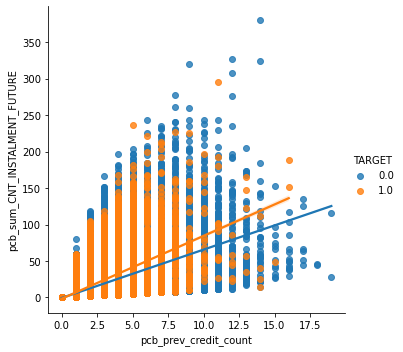

In [40]:
ax = sns.lmplot(y="pcb_sum_CNT_INSTALMENT_FUTURE", x="pcb_prev_credit_count", data=data[data['is_train']==1], hue='TARGET')

With the same number of credit, the clients with loan repayment difficulties have the higher total installment in the future.

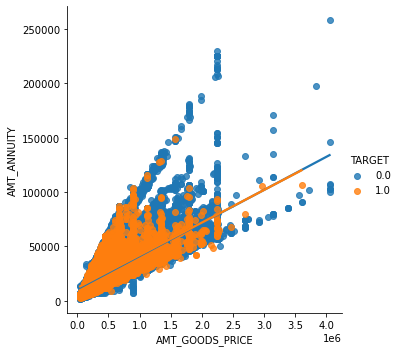

In [64]:
ax = sns.lmplot(x="AMT_GOODS_PRICE", y="AMT_ANNUITY", data=data[data['is_train']==1], hue='TARGET')

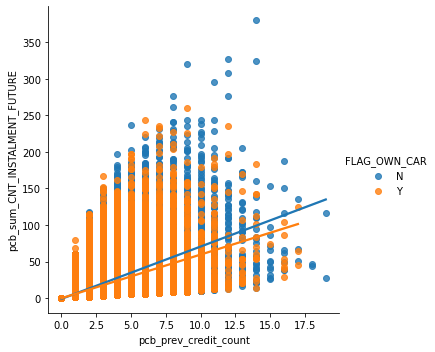

In [57]:
ax = sns.lmplot(y="pcb_sum_CNT_INSTALMENT_FUTURE", x="pcb_prev_credit_count", data=data[data['is_train']==1], hue='FLAG_OWN_CAR')

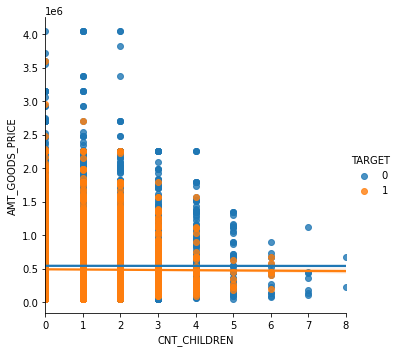

In [65]:
ax = sns.lmplot(y="AMT_GOODS_PRICE", x="CNT_CHILDREN", data=app_train, hue='TARGET')
ax.set(xlim=(0, 8))

The number of children is not correlated to the amount of good price in clients' application.